In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#Saving the Id
train_ID = train['Id']
test_ID = test['Id']

#Now drop the 'Id' column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#print the shape of data
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)


Train data shape: (1460, 80)
Test data shape: (1459, 79)


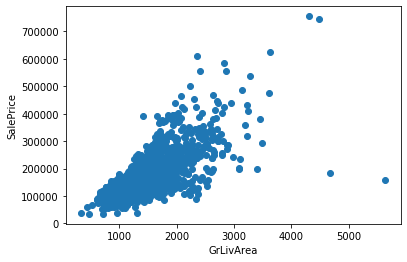

In [ ]:
fig, ax =plt.subplots()
ax.scatter( x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea', fontsize = 10)
plt.ylabel('SalePrice', fontsize = 10)
plt.show()

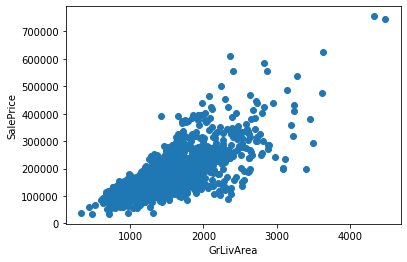

In [ ]:
#Deleting the otliers
train = train.drop(train[(train['GrLivArea'] > 4000) & \
                         (train['SalePrice'] < 300000)].index)
#Verifying the in graph again
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train["SalePrice"])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

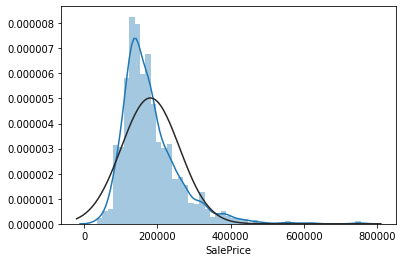

In [ ]:
#visualising the targer variable
sns.distplot(train['SalePrice'], fit = norm)

In [ ]:
#mu and sigma of SalePrice
mu, sigma = norm.fit(train['SalePrice'])
print("MU:", mu)
print("Sigma:",sigma)

MU: 180932.91906721535
Sigma: 79467.78892987774


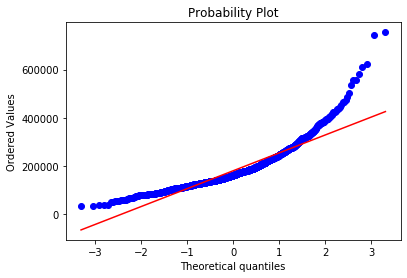

In [ ]:
#Ploting the QQ plt
fig = plt.figure()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

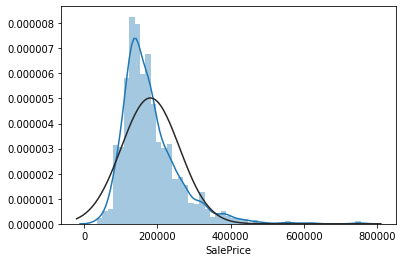

In [ ]:
#Doing log transformation
#train['SalePrice'] = np.log1p(train['SalePrice'])

#Again plotinf distplt
sns.distplot(train['SalePrice'], fit = norm)


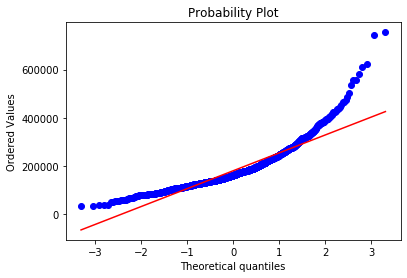

In [ ]:
#Again Pltotting QQ plt
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

In [ ]:
#Again calculating mu and sigma after log transformation
(mu, sigma) = norm.fit(train['SalePrice'])
print('MU:',mu)
print("Sigma:",sigma)

MU: 180932.91906721535
Sigma: 79467.78892987774


In [ ]:
#Concating the train and test.So that we won't have to work twice and we can apply the same statical approach
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat([train, test]).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print("all_data shape:", all_data.shape)

all_data shape: (2917, 79)


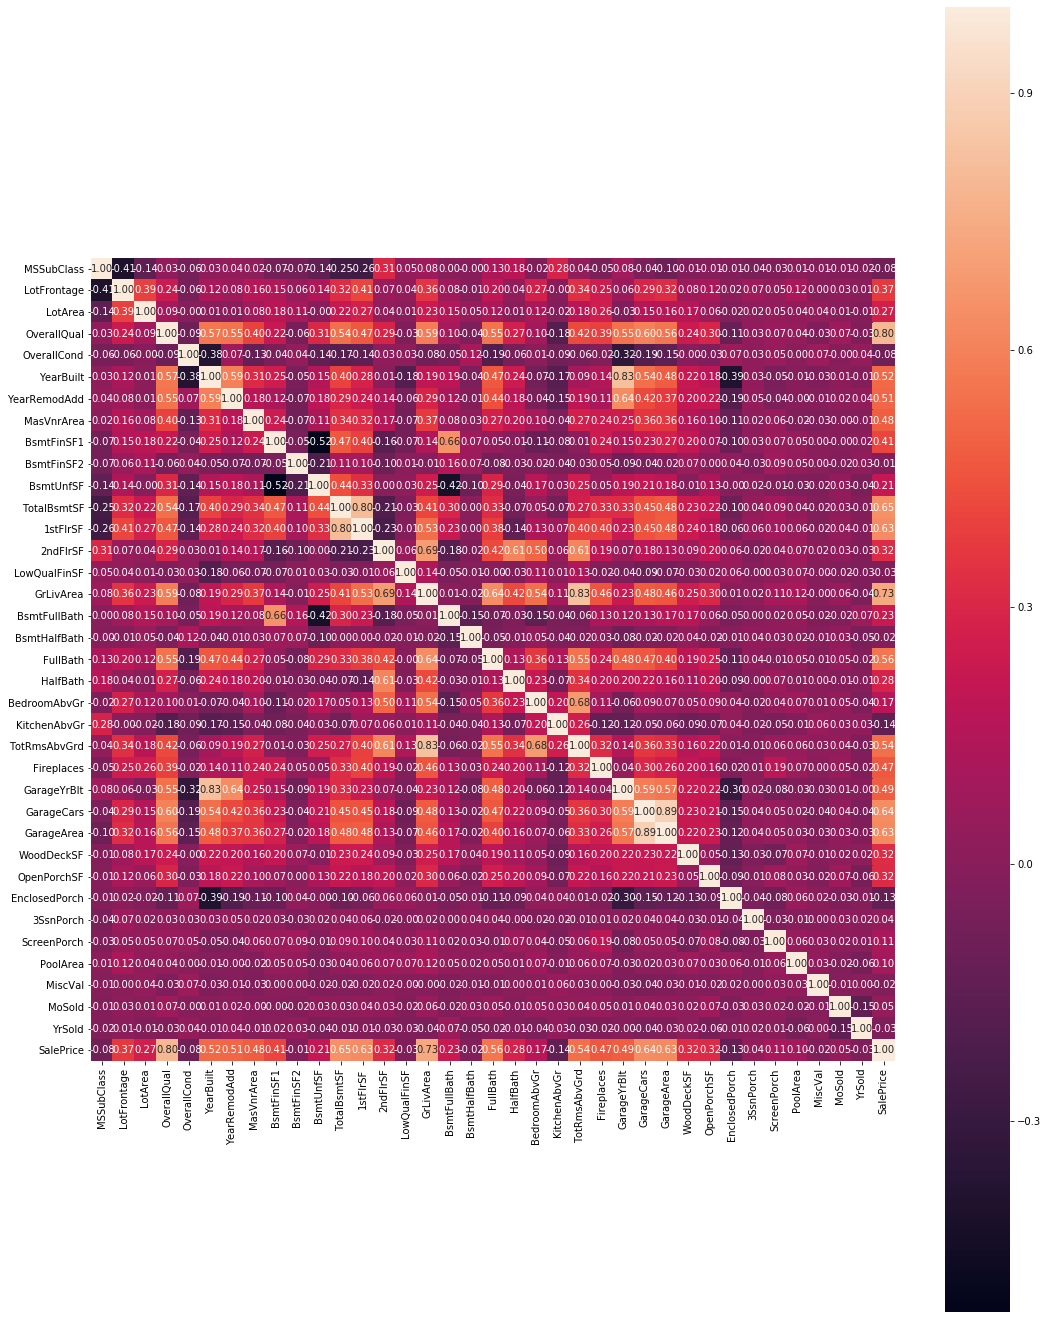

In [ ]:
 
#correlation map to see how features are correlater with SalePrice
corrmat = train.corr()
plt.subplots(figsize = (18, 24))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True, fmt = '0.2f')

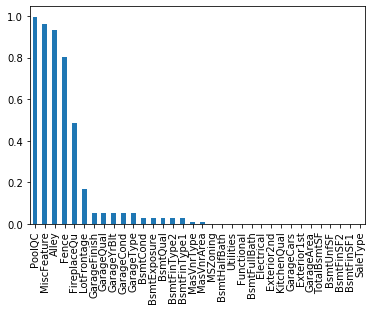

In [ ]:
#Visualising the most missing data
s=all_data.isnull().sum().sort_values(ascending=False)/len(all_data)
s[s>0].plot('bar')

In [ ]:
#replacing the missing data with None because we don't want to loose any feature
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
  all_data[col] = all_data[col].fillna("None")

In [ ]:
'''
Replacing all missing data with 'None', These all have same missing data in same rows.That means If there is no any Garage means
There is no any GarageType and GarageQual and GarageFinish
'''
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
  all_data[col] = all_data[col].fillna('None')

In [ ]:
#Replacing missing value with zero because if there is no any basement it means all should be zero(BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath).
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  all_data[col] = all_data[col].fillna(int(0))
 

In [ ]:
sns.regplot(X =all_data['GarageYrBlt'], y = y_train['SalePrice'], data = all_data)

IndexError: ignored

In [ ]:
#Replacing missing data with 0 because if there is no garage means no any cars, GarageArea and GarageYrBlt
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
  all_data[col] = all_data[col].fillna(int(0))

In [ ]:
#Again if there is no any basement then all should be replaced by 'None' because these are categorical data
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  all_data[col] = all_data[col].fillna('None')

In [ ]:
#If MasVnrtype is Na means there isn no any masonry for these houses so we can fill area with 0 for MasVntAreaandand  None for the MasVnrType
all_data['MasVnrType'] = all_data['MasVnrType'].fillna("None")
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))

In [ ]:
all_data['Utilities'].value_counts()

In [ ]:
#from above data it has been cleared all houses have 'Allpub' except one has Nosewa and 2 missing values So we can drop it safely.We can drop it safely because we are not gooing to lose any information
all_data = all_data.drop(['Utilities'], axis = 1)

In [ ]:
#Replacing with 'Typ' because It is given in description(Home functionality (Assume typical unless deductions are warranted)).
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [ ]:
for col in ('KitchenQual', 'Electrical', 'Exterior1st', 'Exterior2nd','MSZoning', 'SaleType'):
  all_data[col] = all_data[col].fillna((all_data[col]).mode()[0])

In [ ]:
'''
Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood ,
we can fill in missing values by the median LotFrontage of the neighborhood.
'''
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
#Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [ ]:
#Transforming some numerical variables that are really categorical
for col in ('OverallCond', 'YrSold', 'MoSold', 'MSSubClass'):
  all_data[col] = all_data[col].astype(str)

In [ ]:
#Adding total squarefeet feature because Area is most important for prediction house price prediction
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 80)


In [ ]:
all_data = pd.get_dummies(all_data)
print("Shape of data after dummy variable:", all_data.shape)

Shape of data after dummy variable: (2917, 222)


In [ ]:
X_train = all_data[:ntrain]
X_test  = all_data[ntest-1 :]
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1458, 222)
y_train shape: (1458,)
X_test shape: (1459, 222)


In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
seed = 342
np.random.seed(seed)


In [ ]:
#dtrain = xgb.DMatrix(X_train)
#ytrain = xgb.DMatrix(y_train)
#dtest = xgb.DMatrix(X_test)

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [ ]:
params_grid = {
    'max_depth' : [ 2],
    'gamma' : [0, 0.5],
    'n_estimators' : [ 750, 1700],
    'learning_rate' : [0.01, 0.1, 0.4],
    'subsample' : [0.5],
    'colsample_bytree' : [0.4, 0.6],
    'reg_lambda' : [0.1, 0.5],
    'min_child_weight' : [1.5, 1.25]
}

In [ ]:
params_fixed = {
    'objective': 'reg:linear',
    'silent': 1
}

In [ ]:
bst_grid = GridSearchCV(estimator = xgb.XGBRegressor(**params_fixed, seed = seed),
                       param_grid = params_grid,
                       cv = cv,
                       scoring = None)
                       

In [ ]:
bst_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=342, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=Non...
                                    scale_pos_weight=1, seed=342, silent=1,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.4, 0.6], 'gamma': [0, 0.5],
                         'learning_rate': [0.01, 0.1, 0.4], 'max_depth': [2],
                         'min_child_weight': [1.5

In [ ]:
train_scores = cross_val_score(bst_grid, X_train, y_train, cv = cv)
print(scores)
print("Train accuracy {0} and std {1}" .format(scores.mean(), scores.std()))


In [ ]:
#Randomized grid search
params_dist_grid = {
    'max_depth' : 2,
    'gamma' : 0.25,
    'n_estimators' : randint(1, 3000),
    'learning_rate' : uniform(),
    'subsample' : uniform(),
    'colsample_bytree' : 0.75,
    'reg_alpha' : uniform(),
    'reg_lambda' : 0.75,
    'min_child_weight' : 1.25
}

In [ ]:
rs_grid = RandomizedSearchCV(estimator = xgb.XGBRegressor(**params_fixed,
                                                         seed = seed),
                            param_distributions = params_dist_grid,
                            n_iter = 100,
                            cv = cv,
                            scoring = None,
                            random_state = seed)

In [ ]:
rs_grid.fit(X_train, y_train)

TypeError: ignored

In [ ]:
rs_grid.best_params_

AttributeError: ignored

In [ ]:
y_pred = rs_grid.predict(X_test)

NotFittedError: ignored

In [ ]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree= 0.07359718088969058,
                 gamma=1,                 
                 learning_rate= 0.07163406744249201,
                 max_depth=2,
                 min_child_weight=1.5,
                 n_estimators=767,                                                                    
                 reg_alpha=0.005,
                 reg_lambda=0.1,
                 subsample=0.4185815141367779,
                 seed=42)
                               

In [ ]:
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.07359718088969058, gamma=1,
       learning_rate=0.07163406744249201, max_delta_step=0, max_depth=2,
       min_child_weight=1.5, missing=None, n_estimators=767, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.005, reg_lambda=0.1, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.4185815141367779)

In [ ]:
y_pred = best_xgb_model.predict(X_test)

In [ ]:
sub= pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv', index = False)

In [ ]:
Accuracy =0.13396

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.01,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
                               

In [ ]:
Accuracy =  0.12423

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=8,
                 min_child_weight=1.5,
                 n_estimators=12000,                                                                    
                 reg_alpha=0.1,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
                               

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 18)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 150, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10,],
    'n_estimators': [100,200,300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy



best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

In [ ]:
y_pred = best_grid.predict(X_test)

In [ ]:
sub= pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv', index = False)